In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
filename = 'data/london-borough-profiles-jan2018.csv'
df = pd.read_csv(filename,usecols=[70,71],encoding='unicode_escape',)

In [58]:
print(df.to_string())

   Male life expectancy, (2012-14) Female life expectancy, (2012-14)
0                              NaN                               NaN
1                                .                                 .
2                             77.6                              82.1
3                             82.1                              85.1
4                             80.4                              84.4
5                             80.1                              85.1
6                             81.4                              84.9
7                             81.8                              86.7
8                             80.3                              83.6
9                             80.6                              84.2
10                            80.7                              84.1
11                              79                              82.5
12                            78.5                              83.3
13                            79.7

In [77]:
man_life=df['Male life expectancy, (2012-14)'].tolist()
man=man_life[2:-1]
print(man)

['77.6', '82.1', '80.4', '80.1', '81.4', '81.8', '80.3', '80.6', '80.7', '79', '78.5', '79.7', '80.1', '82.7', '80.2', '80.4', '80', '79', '83.3', '82', '78.9', '79', '80.4', '78.5', '80.9', '82.4', '78.9', '80.9', '78.1', '79.4', '79.5']


In [78]:
woman_life=df['Female life expectancy, (2012-14)'].tolist()
woman=woman_life[2:-1]
print(woman)

['82.1', '85.1', '84.4', '85.1', '84.9', '86.7', '83.6', '84.2', '84.1', '82.5', '83.3', '84.1', '84.9', '86.1', '83.9', '83.9', '83.9', '83.5', '86.4', '84.6', '83.3', '83.4', '84.2', '83', '84.6', '86', '83.9', '83.4', '82.5', '83.8', '83.7']


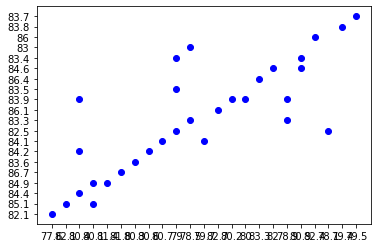

In [79]:
plt.plot(man,woman,'o',color='b')

In [89]:
from sklearn import model_selection

man_train,man_test,woman_train,woman_test=model_selection.train_test_split(man,woman,test_size=0.10)


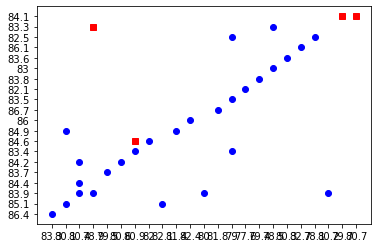

In [90]:
plt.plot(man_train,woman_train,'o',color='b')
plt.plot(man_test,woman_test,'s',color='r')

x: [[ 7.17385764e-01]
 [-7.37488469e-01]
 [-2.23094265e-01]
 [-1.55434929e+00]
 [-5.55684081e-01]
 [-1.80991542e+00]
 [ 1.28796598e+00]
 [ 1.68870531e+00]
 [ 4.79751839e-01]
 [ 7.70207715e-01]
 [-4.96445985e-02]
 [-6.26446499e-01]
 [-9.93606638e-01]
 [-3.22445719e-01]
 [ 1.06716552e+00]
 [-2.30146293e-01]
 [-8.71292223e-01]
 [-1.88318221e+00]
 [ 9.76612599e-01]
 [ 1.05037515e+00]
 [-1.06455213e-01]
 [ 8.33006764e-01]
 [ 9.73786429e-02]
 [ 3.72313783e-01]
 [ 5.29696768e-01]
 [ 2.21074423e+00]
 [ 1.97632305e-01]
 [-4.46455844e-01]
 [ 5.17912020e-02]
 [-4.10043308e-01]
 [ 5.37015090e-01]
 [-3.41884903e-01]
 [-8.49954660e-01]
 [-4.33759831e-01]
 [ 7.35446527e-01]
 [ 7.34576424e-01]
 [ 1.06197998e+00]
 [-8.73997521e-01]
 [ 5.58617173e-01]
 [ 1.21996775e+00]
 [-6.28214120e-01]
 [-6.91988110e-02]
 [ 8.91334227e-01]
 [-2.99735085e-01]
 [-3.67169855e-01]
 [ 2.40485384e-01]
 [-2.18435622e+00]
 [-1.58698837e+00]
 [-1.58829279e-01]
 [ 1.00239451e-01]
 [-3.35124629e-02]
 [-1.18307361e-02]
 [-1.0491

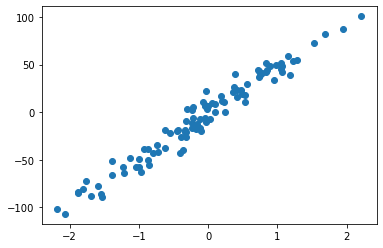

In [261]:
from sklearn import datasets
x,y,p = datasets.make_regression(n_samples=100,n_features=1,n_informative=1,noise=10,coef=True)
print('x:',x,'y:',y,'p:',p)
plt.scatter(x,y)

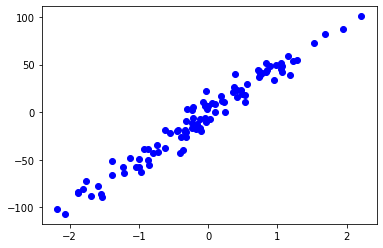

In [262]:
plt.plot(x,y,'o',color='b')

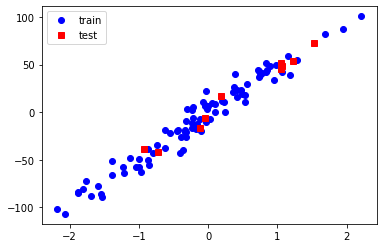

In [263]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.10)
plt.plot(x_train,y_train,'o',color='b',label='train')
plt.plot(x_test,y_test,'s',color='r',label='test')
plt.legend()

[0.013086336973627837, 1.0464583693210117]


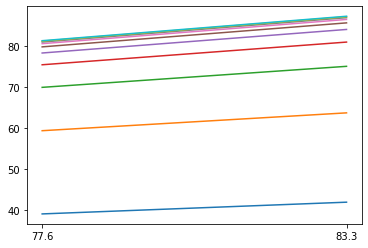

In [275]:
def gradient_descent_2(M,x,w,y,a):
    for i in range(0,M):
        p_y=w[0]+w[1]*float(x[i])
        residual=float(y[i])-p_y
        w[0]=w[0]+a*residual*(1/M)
        w[1]=w[1]+a*residual*float(x[i])*(1/M)
        
        err,R2= computer_error(M,x,w,y)
        R2_list.append(R2)
    
    return w,err

man_train.sort()
woman_train.sort()

w=[0,0]
R2_list=[]
for i in range(0,10):
    w=gradient_descent_2(27,man_train,w,woman_train,0.0001)[0]
    plt.plot([min(man_train),max(man_train)],[w[0]+w[1]*float(min(man_train)),w[0]+w[1]*float(max(man_train))])
print(w)

In [215]:
def computer_error(M,x,w,y):
    error=0
    v=0
    mean_y=0
    for i in y:
        mean_y+=float(i)
    mean_y=mean_y/len(y)
        
    for i in range(0,M):
        p_y=w[0]+w[1]*float(x[i])
        error=float(error)+(float(y[i])-p_y)**2
        v+=(float(y[i])-mean_y)**2
    mean_error=error/M
    return mean_error,1-(error/v)
print(computer_error(27,man_train,w,woman_train)[0])

0.23151375726286416


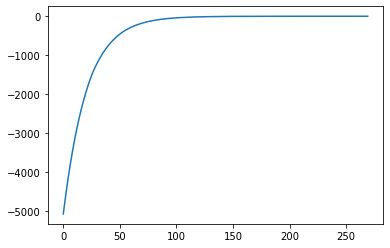

In [217]:
plt.plot(R2_list)

synthetic data set

84.78996124614604 0.9583342876818307


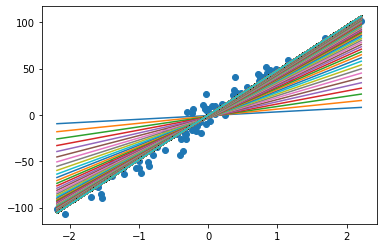

In [291]:

w1=[0,0]
R2_list=[]
err_list=[]
for i in range(0,1000):
    w1,err=gradient_descent_2(len(x_train),x_train,w1,y_train,0.1)
    err_list.append(err)
    plt.plot([min(x_train),max(x_train)],[w1[0]+w1[1]*float(min(x_train)),w1[0]+w1[1]*float(max(x_train))])
plt.scatter(x_train,y_train)
print(err_list[-1],R2_list[-1])

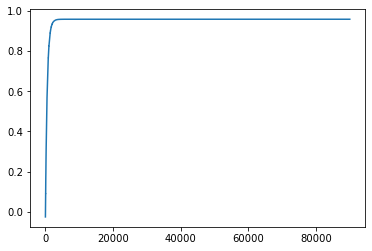

In [287]:
plt.plot(R2_list)


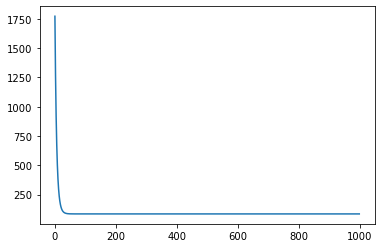

In [288]:
plt.plot(err_list)


34.21818875702081 0.9782083086823526


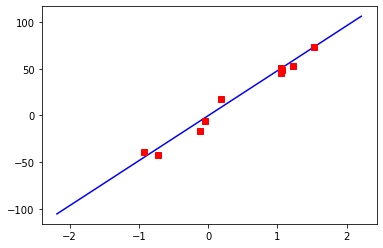

In [300]:
plt.plot([min(x_train),max(x_train)],[w1[0]+w1[1]*float(min(x_train)),w1[0]+w1[1]*float(max(x_train))],color='b')
plt.plot(x_test,y_test,'s',color='r')
err1,R2=computer_error(len(x_test),x_test,w1,y_test)
print(err1,R2)


## 5

In [324]:
from sklearn import datasets
x,y =datasets.make_classification(n_features =1,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class
                                 =1,n_samples=100)
print(x[0],'=============',x[1])

[0.82156088] ============= [1.34600056]


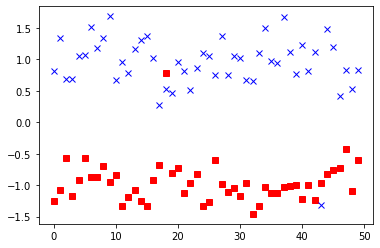

In [330]:
plt.plot(x[:][y==0],'s',c='r')
plt.plot(x[:][y==1],'x',c='b')

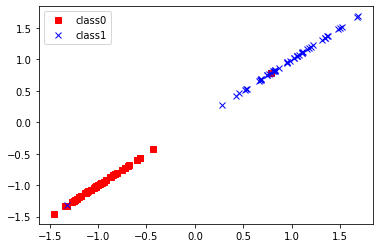

In [332]:
plt.plot(x[:][y==0],x[:][y==0],'s',c='r',label='class0')
plt.plot(x[:][y==1],x[:][y==1],'x',c='b',label='class1')
plt.legend()

In [334]:
from sklearn import linear_model
per=linear_model.Perceptron()
per.fit(x,y)
y_hat=per.predict(x)


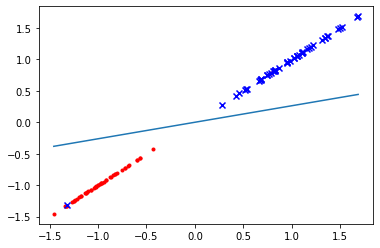

In [335]:
plt.scatter(x[:,0][y==0], x[:,0][y==0], c='r', marker='.')
plt.scatter(x[:,0][y==1], x[:,0][y==1], c='b', marker='x')
plt.plot([min(x), max(x)], [per.coef_[0][0] * min(x) + per.intercept_, per.coef_[0][0] * max(x) + per.intercept_])

In [336]:
from sklearn import metrics
print(f'accuracy = {metrics.accuracy_score(y, y_hat, normalize=True)}')

accuracy = 0.98
